In [1]:
import pandas as pd
import numpy as np
import scipy 
import seaborn as sns
from matplotlib import pyplot as plt
import re
from matplotlib.ticker import MaxNLocator
import squarify
import textwrap3
from textwrap3 import wrap
import random2
from matplotlib_venn import venn2, venn3, venn3_circles
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

pd.set_option('display.max_colwidth', 100)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

In [2]:
analysis = '/work/projects/ecosystem_biology/archaea/coevolution/analysis'
pics = '/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/pics'

import archaeal and bacterial proteins

In [3]:
unique_gut = pd.read_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/unique_gut_proteins.csv')
unique_gut = unique_gut[unique_gut['count']!=1]

In [4]:
functions_bac = pd.read_csv(analysis+'/intermediate_results/bacteria_kegg_gut_functions_annotation.csv',
           sep='\t')
functions_bac.drop_duplicates(['protein', 'cluster', 'id', 'description'], inplace=True)

In [5]:
functions_arch = pd.read_csv(analysis+'/intermediate_results/archaea_kegg_unique_gut_functions_annotation.csv',
           sep='\t')
functions_arch.drop_duplicates(['protein', 'cluster', 'id', 'description'], inplace=True)
functions_arch = functions_arch[['protein', 'cluster', 'id', 'description']]
functions_arch['cluster'] = 'a_' + functions_arch['cluster'].astype(str)

import databases to annotate archaeal proteins

In [6]:
ec = pd.read_csv("/work/projects/ecosystem_biology/archaea/coevolution/analysis/mantis/archaea/archaea_annot_ec.tsv", 
            delimiter="\t", header=None, names=['protein', 'id', 'description'])
eggnog = pd.read_csv("/work/projects/ecosystem_biology/archaea/coevolution/analysis/mantis/archaea/archaea_annot_eggnog.tsv", 
            delimiter="\t", header=None, names=['protein', 'id', 'description'])
pfam = pd.read_csv("/work/projects/ecosystem_biology/archaea/coevolution/analysis/mantis/archaea/archaea_annot_pfam.tsv", 
            delimiter="\t", header=None, names=['protein', 'id', 'description'])
kegg = pd.read_csv("/work/projects/ecosystem_biology/archaea/coevolution/analysis/mantis/archaea/archaea_annot_kegg.tsv", 
            delimiter="\t", header=None, names=['protein', 'id', 'description'])

if i wanna do on all gut archaea (gut uniqur and not unique)

In [7]:
# functions_arch = unique_gut.merge(kegg, on='protein')[['protein', 'cluster', 'id', 'description']]
# functions_arch['cluster'] = 'a_' + functions_arch['cluster'].astype(str)
# functions_arch.drop_duplicates(['protein', 'cluster', 'id', 'description'], inplace=True)

In [8]:
id_cluster_bac = functions_bac[['id', 'cluster']].drop_duplicates(['id', 'cluster'])
id_cluster_arch = functions_arch[['id', 'cluster']].drop_duplicates(['id', 'cluster'])

check

In [9]:
id_cluster_bac.groupby('cluster').agg({'id':'count'}).sort_values('id', ascending=False).head(30)

id
cluster       
b_2767794   19
b_8296021   18
b_13028190  17
b_13076835  15
b_3290617   14
b_13730287  13
b_13659431  12
b_2596645   12
b_11206492  12
b_7610313   12
b_2014136   12
b_11080699  12
b_2437337   11
b_3569620   11
b_3555743   11
b_5098496   11
b_1806977   11
b_4670206   11
b_3122615   11
b_9468817   11
b_2273323   11
b_3049264   11
b_10963125  11
b_10379558  10
b_3764490   10
b_9248663   10
b_8533221   10
b_1927665   10
b_4174242   10
b_8918696   10

In [10]:
functions_bac[functions_bac.cluster=='b_8918696'].groupby('id').agg({'protein':'count'})

protein
id             
K02656        2
K03350        2
K09503        2
K09667       16
K12600        6
K19360        6
K19373       15
K20480       11
K20543        5
K23424        9

#### extract common ids

In [11]:
common_ids2clusters = pd.merge(id_cluster_bac,id_cluster_arch, on='id')
common_ids2clusters

id   cluster_x cluster_y
0     K19506   b_4683921  a_232524
1     K19506   b_2870162  a_232524
2     K19506   b_6365458  a_232524
3     K19506  b_10383251  a_232524
4     K19506   b_6029216  a_232524
...      ...         ...       ...
5115  K04578  b_10038932  a_170541
5116  K02449   b_4852848  a_201035
5117  K06577   b_1397727  a_132380
5118  K15044   b_1561924   a_38898
5119  K15809   b_6145928  a_206021

[5120 rows x 3 columns]

In [12]:
common_ids2clusters.cluster_x.nunique(), common_ids2clusters.cluster_y.nunique() 
# 1094420 candidate bacterial clusters 
# 43514 candidate archaeal clusters

(2502, 131)

would be good to remove cluster if a common function is a minority

In [13]:
common_ids = common_ids2clusters[['id']].drop_duplicates()
common_ids

id
0     K19506
186   K09974
265   K20262
299   K06407
1067  K06406
...      ...
5115  K04578
5116  K02449
5117  K06577
5118  K15044
5119  K15809

[73 rows x 1 columns]

## remove in archaea first

In [14]:
candidate_archaea = common_ids.merge(functions_arch) #1147 candidate proteins
candidate_archaea

id                      protein   cluster  \
0     K19506  GUT_GENOME278408.fasta_1462  a_232524   
1     K19506  GUT_GENOME135886.fasta_1623  a_232524   
2     K09974  GUT_GENOME085231.fasta_1776   a_64521   
3     K09974  GUT_GENOME103466.fasta_1756   a_64521   
4     K20262   GUT_GENOME232921.fasta_508  a_211970   
...      ...                          ...       ...   
1142  K06577  GUT_GENOME138236.fasta_1292  a_132380   
1143  K15044   GUT_GENOME048380.fasta_988   a_38898   
1144  K15044   GUT_GENOME048397.fasta_692   a_38898   
1145  K15809    GUT_GENOME163212.fasta_20  a_206021   
1146  K15809  GUT_GENOME253592.fasta_1086  a_206021   

                                                 description  
0     fructoselysine/glucoselysine PTS system EIIA component  
1     fructoselysine/glucoselysine PTS system EIIA component  
2                                    uncharacterized protein  
3                                    uncharacterized protein  
4                     dihydrophenazinedicarboxylate synthase  
...                                                      ...  
1142                           Kell blood group glycoprotein  
1143      Arf-GAP domain and FG repeats-containing protein 1  
1144      Arf-GAP domain and FG repeats-containing protein 1  
1145                               cis-muuroladiene synthase  
1146                               cis-muuroladiene synthase  

[1147 rows x 4 columns]

In [15]:
candidate_archaea.groupby('cluster').count()

id  protein  description
cluster                            
a_100893    3        3            3
a_102072    2        2            2
a_103470    2        2            2
a_104986    3        3            3
a_107930    2        2            2
...       ...      ...          ...
a_91313     6        6            6
a_92079     7        7            7
a_95845     2        2            2
a_95863   343      343          343
a_96889     3        3            3

[131 rows x 3 columns]

In [16]:
candidate_archaea\
.groupby(['cluster'], as_index=False)\
.agg({'protein':'count'})

cluster  protein
0    a_100893        3
1    a_102072        2
2    a_103470        2
3    a_104986        3
4    a_107930        2
..        ...      ...
126   a_91313        6
127   a_92079        7
128   a_95845        2
129   a_95863      343
130   a_96889        3

[131 rows x 2 columns]

In [17]:
candidate_archaea_count = candidate_archaea\
.groupby(['cluster'], as_index=False)\
.agg({'protein':'count'})

candidate_archaea_count = candidate_archaea_count[candidate_archaea_count.protein>=5]
candidate_archaea_count.head(30)

candidate_archaea_count.rename(columns={'protein':'total_clusters_count'}, inplace=True)

candidate_archaea_count
# \
# .sort_values(['cluster', 'protein'], ascending=False)

cluster  total_clusters_count
8    a_116925                     7
9    a_121399                     5
16   a_129373                    50
17   a_132380                     7
18   a_135089                     9
20   a_135737                    16
25   a_147408                     8
29   a_151581                     6
33   a_159495                    38
43    a_18692                    12
55    a_21044                    12
61   a_221921                     5
68   a_240959                     5
69   a_245601                     5
70   a_246691                     5
71   a_246709                     7
77     a_3530                   153
84    a_37787                    94
89    a_43431                     7
94    a_45460                    11
101   a_51418                    15
104   a_55510                     7
106   a_60600                     8
119   a_73547                     8
120   a_74163                    10
121   a_74498                    12
122   a_74756                     6
125   a_80404                    25
126   a_91313                     6
127   a_92079                     7
129   a_95863                   343

In [18]:
candidate_archaea_count['cluster'].nunique() # 31 unique clusters >=5 proteins

31

In [21]:
candidate_archaea_count.merge(candidate_archaea).id.nunique() # 24 common ids in clusters with more than 5 annotated proteins

24

In [22]:
candidate_archaea = candidate_archaea.merge(candidate_archaea_count, on=['cluster']) # 909 proteins
candidate_archaea

id                      protein   cluster  \
0    K19082   GUT_GENOME103991.fasta_782   a_60600   
1    K19082    GUT_GENOME074072.fasta_78   a_60600   
2    K19082   GUT_GENOME161846.fasta_170   a_60600   
3    K19082   GUT_GENOME161057.fasta_907   a_60600   
4    K19082   GUT_GENOME162792.fasta_580   a_60600   
..      ...                          ...       ...   
904  K06577  GUT_GENOME192598.fasta_1419  a_132380   
905  K06577   GUT_GENOME161035.fasta_978  a_132380   
906  K06577  GUT_GENOME068702.fasta_1363  a_132380   
907  K06577   GUT_GENOME239592.fasta_998  a_132380   
908  K06577  GUT_GENOME138236.fasta_1292  a_132380   

                                                                 description  \
0    two-component system, OmpR family, response regulator protein BraR/BceR   
1    two-component system, OmpR family, response regulator protein BraR/BceR   
2    two-component system, OmpR family, response regulator protein BraR/BceR   
3    two-component system, OmpR family, response regulator protein BraR/BceR   
4    two-component system, OmpR family, response regulator protein BraR/BceR   
..                                                                       ...   
904                                            Kell blood group glycoprotein   
905                                            Kell blood group glycoprotein   
906                                            Kell blood group glycoprotein   
907                                            Kell blood group glycoprotein   
908                                            Kell blood group glycoprotein   

     total_clusters_count  
0                       8  
1                       8  
2                       8  
3                       8  
4                       8  
..                    ...  
904                     7  
905                     7  
906                     7  
907                     7  
908                     7  

[909 rows x 5 columns]

In [23]:
candidate_archaea_count_2 = candidate_archaea\
.groupby(['cluster', 'id'], as_index=False)\
.agg({'protein':'count'})

# candidate_archaea_count_2 = candidate_archaea_count_2[candidate_archaea_count_2.protein>=10]
# candidate_archaea_count_2.head(30)

candidate_archaea_count_2.rename(columns={'protein':'id_count'}, inplace=True)

candidate_archaea_count_2
# # \
# # .sort_values(['cluster', 'protein'], ascending=False)

cluster      id  id_count
0   a_116925  K22554         7
1   a_121399  K24356         5
2   a_129373  K00214        50
3   a_132380  K06577         7
4   a_135089  K16195         9
5   a_135737  K12706        16
6   a_147408  K14495         8
7   a_151581  K17465         6
8   a_159495  K02369        38
9    a_18692  K09469        12
10   a_21044  K12706        12
11  a_221921  K21691         5
12  a_240959  K05615         5
13  a_245601  K12091         5
14  a_246691  K15198         5
15  a_246709  K13546         7
16    a_3530  K11234       153
17   a_37787  K10436        94
18   a_43431  K19481         7
19   a_45460  K14495        11
20   a_51418  K14495        15
21   a_55510  K16158         7
22   a_60600  K19082         8
23   a_73547  K12706         8
24   a_74163  K23498        10
25   a_74498  K12706        12
26   a_74756  K11518         6
27   a_80404  K19543        25
28   a_91313  K16195         6
29   a_92079  K01086         7
30   a_95863  K14495       343

In [24]:
candidate_archaea_2 = candidate_archaea.merge(candidate_archaea_count_2, on=['cluster', 'id'])
candidate_archaea_2

id                      protein   cluster  \
0    K19082   GUT_GENOME103991.fasta_782   a_60600   
1    K19082    GUT_GENOME074072.fasta_78   a_60600   
2    K19082   GUT_GENOME161846.fasta_170   a_60600   
3    K19082   GUT_GENOME161057.fasta_907   a_60600   
4    K19082   GUT_GENOME162792.fasta_580   a_60600   
..      ...                          ...       ...   
904  K06577  GUT_GENOME192598.fasta_1419  a_132380   
905  K06577   GUT_GENOME161035.fasta_978  a_132380   
906  K06577  GUT_GENOME068702.fasta_1363  a_132380   
907  K06577   GUT_GENOME239592.fasta_998  a_132380   
908  K06577  GUT_GENOME138236.fasta_1292  a_132380   

                                                                 description  \
0    two-component system, OmpR family, response regulator protein BraR/BceR   
1    two-component system, OmpR family, response regulator protein BraR/BceR   
2    two-component system, OmpR family, response regulator protein BraR/BceR   
3    two-component system, OmpR family, response regulator protein BraR/BceR   
4    two-component system, OmpR family, response regulator protein BraR/BceR   
..                                                                       ...   
904                                            Kell blood group glycoprotein   
905                                            Kell blood group glycoprotein   
906                                            Kell blood group glycoprotein   
907                                            Kell blood group glycoprotein   
908                                            Kell blood group glycoprotein   

     total_clusters_count  id_count  
0                       8         8  
1                       8         8  
2                       8         8  
3                       8         8  
4                       8         8  
..                    ...       ...  
904                     7         7  
905                     7         7  
906                     7         7  
907                     7         7  
908                     7         7  

[909 rows x 6 columns]

In [25]:
candidate_archaea_2['ratio'] = candidate_archaea_2['id_count']/candidate_archaea_2['total_clusters_count']

In [26]:
# candidate_archaea_2.sort_values('total_clusters_count', ascending=False)
candidate_archaea_2[(candidate_archaea_2.ratio>=0.1) 
                    & (candidate_archaea_2.id_count!=1)]\
.sort_values('ratio', ascending=True).head(50)

id                      protein   cluster  \
0    K19082   GUT_GENOME103991.fasta_782   a_60600   
598  K23498  GUT_GENOME067252.fasta_1679   a_74163   
599  K23498  GUT_GENOME093033.fasta_1104   a_74163   
600  K23498  GUT_GENOME068480.fasta_1254   a_74163   
601  K11234  GUT_GENOME192495.fasta_1046    a_3530   
602  K11234            3300029790_36_517    a_3530   
603  K11234  GUT_GENOME213510.fasta_1389    a_3530   
604  K11234  GUT_GENOME092376.fasta_1183    a_3530   
605  K11234   GUT_GENOME089303.fasta_922    a_3530   
606  K11234  GUT_GENOME251364.fasta_1418    a_3530   
607  K11234   GUT_GENOME078972.fasta_174    a_3530   
608  K11234   GUT_GENOME090243.fasta_494    a_3530   
597  K23498  GUT_GENOME104028.fasta_1397   a_74163   
609  K11234  GUT_GENOME133176.fasta_1237    a_3530   
611  K11234   GUT_GENOME186770.fasta_172    a_3530   
612  K11234   GUT_GENOME255634.fasta_913    a_3530   
613  K11234   GUT_GENOME238655.fasta_345    a_3530   
614  K11234  GUT_GENOME239080.fasta_1546    a_3530   
615  K11234  GUT_GENOME267102.fasta_1600    a_3530   
616  K11234   GUT_GENOME190906.fasta_368    a_3530   
617  K11234   GUT_GENOME284192.fasta_998    a_3530   
618  K11234   GUT_GENOME285252.fasta_419    a_3530   
619  K11234   GUT_GENOME090576.fasta_821    a_3530   
620  K11234   GUT_GENOME159990.fasta_259    a_3530   
621  K11234   GUT_GENOME143268.fasta_395    a_3530   
610  K11234   GUT_GENOME143271.fasta_388    a_3530   
622  K11234   GUT_GENOME170659.fasta_731    a_3530   
596  K23498  GUT_GENOME066393.fasta_1786   a_74163   
594  K23498  GUT_GENOME104888.fasta_1481   a_74163   
570  K13546   GUT_GENOME011713.fasta_678  a_246709   
571  K13546    GUT_GENOME284400.fasta_24  a_246709   
572  K13546   GUT_GENOME020796.fasta_956  a_246709   
573  K13546   GUT_GENOME236703.fasta_384  a_246709   
574  K24356    GUT_GENOME239133.fasta_90  a_121399   
575  K24356  GUT_GENOME143264.fasta_1435  a_121399   
576  K24356   GUT_GENOME239209.fasta_123  a_121399   
577  K24356   GUT_GENOME143263.fasta_980  a_121399   
578  K24356   GUT_GENOME143262.fasta_942  a_121399   
579  K09469   GUT_GENOME068480.fasta_744   a_18692   
580  K09469  GUT_GENOME267332.fasta_1526   a_18692   
595  K23498   GUT_GENOME267347.fasta_639   a_74163   
581  K09469    GUT_GENOME257522.fasta_13   a_18692   
583  K09469   GUT_GENOME064456.fasta_642   a_18692   
584  K09469    GUT_GENOME104028.fasta_10   a_18692   
585  K09469  GUT_GENOME020562.fasta_1496   a_18692   
586  K09469   GUT_GENOME091148.fasta_458   a_18692   
587  K09469   GUT_GENOME067252.fasta_125   a_18692   
588  K09469   GUT_GENOME087102.fasta_722   a_18692   
589  K09469  GUT_GENOME152906.fasta_1436   a_18692   
590  K09469   GUT_GENOME095171.fasta_556   a_18692   

                                                                 description  \
0    two-component system, OmpR family, response regulator protein BraR/BceR   
598                                             peptide chain release factor   
599                                             peptide chain release factor   
600                                             peptide chain release factor   
601                                            mating pheromone alpha-factor   
602                                            mating pheromone alpha-factor   
603                                            mating pheromone alpha-factor   
604                                            mating pheromone alpha-factor   
605                                            mating pheromone alpha-factor   
606                                            mating pheromone alpha-factor   
607                                            mating pheromone alpha-factor   
608                                            mating pheromone alpha-factor   
597                                             peptide chain release factor   
609                                            mating pheromone alpha-factor   
611                                            mating 

In [27]:
candidate_archaea_2[candidate_archaea_2.cluster=='a_37787']

id                      protein  cluster  \
14   K10436   GUT_GENOME103991.fasta_350  a_37787   
15   K10436  GUT_GENOME086893.fasta_1712  a_37787   
16   K10436  GUT_GENOME190491.fasta_1279  a_37787   
17   K10436  GUT_GENOME190261.fasta_1377  a_37787   
18   K10436  GUT_GENOME240080.fasta_1218  a_37787   
..      ...                          ...      ...   
103  K10436  GUT_GENOME273866.fasta_1312  a_37787   
104  K10436   GUT_GENOME244876.fasta_571  a_37787   
105  K10436  GUT_GENOME093215.fasta_1369  a_37787   
106  K10436   GUT_GENOME024578.fasta_508  a_37787   
107  K10436  GUT_GENOME018729.fasta_1321  a_37787   

                                      description  total_clusters_count  \
14   microtubule-associated protein, RP/EB family                    94   
15   microtubule-associated protein, RP/EB family                    94   
16   microtubule-associated protein, RP/EB family                    94   
17   microtubule-associated protein, RP/EB family                    94   
18   microtubule-associated protein, RP/EB family                    94   
..                                            ...                   ...   
103  microtubule-associated protein, RP/EB family                    94   
104  microtubule-associated protein, RP/EB family                    94   
105  microtubule-associated protein, RP/EB family                    94   
106  microtubule-associated protein, RP/EB family                    94   
107  microtubule-associated protein, RP/EB family                    94   

     id_count  ratio  
14         94    1.0  
15         94    1.0  
16         94    1.0  
17         94    1.0  
18         94    1.0  
..        ...    ...  
103        94    1.0  
104        94    1.0  
105        94    1.0  
106        94    1.0  
107        94    1.0  

[94 rows x 7 columns]

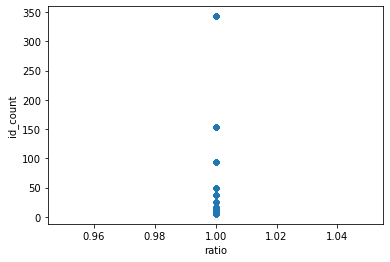

In [28]:
candidate_archaea_2.plot('ratio', 'id_count', kind='scatter')

In [29]:
candidate_archaea_2.cluster.nunique()

31

In [30]:
candidate_archaea_2.id.nunique()

24

In [31]:
candidate_archaea_2[candidate_archaea_2.id_count!=1].id.nunique()

24

In [32]:
candidate_archaea_2[candidate_archaea_2.ratio>=0.1].id.nunique()

24

In [33]:
candidate_archaea_2[(candidate_archaea_2.ratio>=0.1) & (candidate_archaea_2.id_count!=1)].id.nunique()

24

👆use this condition

In [34]:
candidate_archaea_fin = candidate_archaea_2[(candidate_archaea_2.ratio>=0.1) & (candidate_archaea_2.id_count!=1)]
candidate_archaea_fin # 909

id                      protein   cluster  \
0    K19082   GUT_GENOME103991.fasta_782   a_60600   
1    K19082    GUT_GENOME074072.fasta_78   a_60600   
2    K19082   GUT_GENOME161846.fasta_170   a_60600   
3    K19082   GUT_GENOME161057.fasta_907   a_60600   
4    K19082   GUT_GENOME162792.fasta_580   a_60600   
..      ...                          ...       ...   
904  K06577  GUT_GENOME192598.fasta_1419  a_132380   
905  K06577   GUT_GENOME161035.fasta_978  a_132380   
906  K06577  GUT_GENOME068702.fasta_1363  a_132380   
907  K06577   GUT_GENOME239592.fasta_998  a_132380   
908  K06577  GUT_GENOME138236.fasta_1292  a_132380   

                                                                 description  \
0    two-component system, OmpR family, response regulator protein BraR/BceR   
1    two-component system, OmpR family, response regulator protein BraR/BceR   
2    two-component system, OmpR family, response regulator protein BraR/BceR   
3    two-component system, OmpR family, response regulator protein BraR/BceR   
4    two-component system, OmpR family, response regulator protein BraR/BceR   
..                                                                       ...   
904                                            Kell blood group glycoprotein   
905                                            Kell blood group glycoprotein   
906                                            Kell blood group glycoprotein   
907                                            Kell blood group glycoprotein   
908                                            Kell blood group glycoprotein   

     total_clusters_count  id_count  ratio  
0                       8         8    1.0  
1                       8         8    1.0  
2                       8         8    1.0  
3                       8         8    1.0  
4                       8         8    1.0  
..                    ...       ...    ...  
904                     7         7    1.0  
905                     7         7    1.0  
906                     7         7    1.0  
907                     7         7    1.0  
908                     7         7    1.0  

[909 rows x 7 columns]

was 402841 proteins, now 279094

## now same in Bacteria

In [35]:
candidate_bac = common_ids.merge(functions_bac) #33368414 candidate proteins
candidate_bac

id                 protein    cluster  \
0      K19506  GUT_GENOME001575_1_140  b_4683921   
1      K19506      3300007353_12_1571  b_4683921   
2      K19506  GUT_GENOME284747_39_17  b_4683921   
3      K19506  GUT_GENOME204926_16_52  b_4683921   
4      K19506  GUT_GENOME000917_7_101  b_4683921   
...       ...                     ...        ...   
69972  K15809  GUT_GENOME199423_46_12  b_6145928   
69973  K15809   GUT_GENOME000831_5_69  b_6145928   
69974  K15809   GUT_GENOME028831_6_74  b_6145928   
69975  K15809  GUT_GENOME058845_1_135  b_6145928   
69976  K15809   GUT_GENOME054189_5_74  b_6145928   

                                                  description  
0      fructoselysine/glucoselysine PTS system EIIA component  
1      fructoselysine/glucoselysine PTS system EIIA component  
2      fructoselysine/glucoselysine PTS system EIIA component  
3      fructoselysine/glucoselysine PTS system EIIA component  
4      fructoselysine/glucoselysine PTS system EIIA component  
...                                                       ...  
69972                               cis-muuroladiene synthase  
69973                               cis-muuroladiene synthase  
69974                               cis-muuroladiene synthase  
69975                               cis-muuroladiene synthase  
69976                               cis-muuroladiene synthase  

[69977 rows x 4 columns]

In [36]:
candidate_bac_count = candidate_bac\
.groupby(['cluster'], as_index=False)\
.agg({'protein':'count'})

candidate_bac_count = candidate_bac_count[candidate_bac_count.protein>=10]
candidate_bac_count.head(30)

candidate_bac_count.rename(columns={'protein':'total_clusters_count'}, inplace=True)

candidate_bac_count
# \
# .sort_values(['cluster', 'total_clusters_count'], ascending=False)

cluster  total_clusters_count
0     b_10007650                    21
1     b_10011542                    19
2     b_10038916                    28
3     b_10038917                    32
4     b_10038932                    11
...          ...                   ...
2496   b_9955350                    13
2497   b_9956428                    20
2499    b_997696                    24
2500    b_997808                    16
2501   b_9981406                    22

[2281 rows x 2 columns]

In [37]:
candidate_bac_count['cluster'].nunique() # 1022640 unique clusters >=10 proteins

2281

In [49]:
candidate_bac.id.nunique()

63

In [38]:
candidate_bac = candidate_bac.merge(candidate_bac_count, on=['cluster']) # 32067011 proteins
candidate_bac.protein.nunique()


68766

In [39]:
candidate_bac_count_2 = candidate_bac\
.groupby(['cluster', 'id'], as_index=False)\
.agg({'protein':'count'})

# candidate_bac_count_2 = candidate_bac_count_2[candidate_bac_count_2.protein>=10]
# candidate_bac_count_2.head(30)

candidate_bac_count_2.rename(columns={'protein':'id_count'}, inplace=True)

candidate_bac_count_2
# # \
# # .sort_values(['cluster', 'protein'], ascending=False)

cluster      id  id_count
0     b_10007650  K13059        21
1     b_10011542  K13059        19
2     b_10038916  K06406        28
3     b_10038917  K06407        32
4     b_10038932  K04578        11
...          ...     ...       ...
2277   b_9955350  K19506        13
2278   b_9956428  K19082        20
2279    b_997696  K19082        24
2280    b_997808  K19082        16
2281   b_9981406  K13059        22

[2282 rows x 3 columns]

In [40]:
candidate_bac_2 = candidate_bac.merge(candidate_bac_count_2, on=['cluster', 'id'])
candidate_bac_2 # id_count - how many proteins

id                 protein    cluster  \
0      K19506  GUT_GENOME001575_1_140  b_4683921   
1      K19506      3300007353_12_1571  b_4683921   
2      K19506  GUT_GENOME284747_39_17  b_4683921   
3      K19506  GUT_GENOME204926_16_52  b_4683921   
4      K19506  GUT_GENOME000917_7_101  b_4683921   
...       ...                     ...        ...   
68761  K15809  GUT_GENOME199423_46_12  b_6145928   
68762  K15809   GUT_GENOME000831_5_69  b_6145928   
68763  K15809   GUT_GENOME028831_6_74  b_6145928   
68764  K15809  GUT_GENOME058845_1_135  b_6145928   
68765  K15809   GUT_GENOME054189_5_74  b_6145928   

                                                  description  \
0      fructoselysine/glucoselysine PTS system EIIA component   
1      fructoselysine/glucoselysine PTS system EIIA component   
2      fructoselysine/glucoselysine PTS system EIIA component   
3      fructoselysine/glucoselysine PTS system EIIA component   
4      fructoselysine/glucoselysine PTS system EIIA component   
...                                                       ...   
68761                               cis-muuroladiene synthase   
68762                               cis-muuroladiene synthase   
68763                               cis-muuroladiene synthase   
68764                               cis-muuroladiene synthase   
68765                               cis-muuroladiene synthase   

       total_clusters_count  id_count  
0                        22        22  
1                        22        22  
2                        22        22  
3                        22        22  
4                        22        22  
...                     ...       ...  
68761                    16        16  
68762                    16        16  
68763                    16        16  
68764                    16        16  
68765                    16        16  

[68766 rows x 6 columns]

In [41]:
candidate_bac_2['ratio'] = candidate_bac_2['id_count']/candidate_bac_2['total_clusters_count']


In [42]:
candidate_bac_2

id                 protein    cluster  \
0      K19506  GUT_GENOME001575_1_140  b_4683921   
1      K19506      3300007353_12_1571  b_4683921   
2      K19506  GUT_GENOME284747_39_17  b_4683921   
3      K19506  GUT_GENOME204926_16_52  b_4683921   
4      K19506  GUT_GENOME000917_7_101  b_4683921   
...       ...                     ...        ...   
68761  K15809  GUT_GENOME199423_46_12  b_6145928   
68762  K15809   GUT_GENOME000831_5_69  b_6145928   
68763  K15809   GUT_GENOME028831_6_74  b_6145928   
68764  K15809  GUT_GENOME058845_1_135  b_6145928   
68765  K15809   GUT_GENOME054189_5_74  b_6145928   

                                                  description  \
0      fructoselysine/glucoselysine PTS system EIIA component   
1      fructoselysine/glucoselysine PTS system EIIA component   
2      fructoselysine/glucoselysine PTS system EIIA component   
3      fructoselysine/glucoselysine PTS system EIIA component   
4      fructoselysine/glucoselysine PTS system EIIA component   
...                                                       ...   
68761                               cis-muuroladiene synthase   
68762                               cis-muuroladiene synthase   
68763                               cis-muuroladiene synthase   
68764                               cis-muuroladiene synthase   
68765                               cis-muuroladiene synthase   

       total_clusters_count  id_count  ratio  
0                        22        22    1.0  
1                        22        22    1.0  
2                        22        22    1.0  
3                        22        22    1.0  
4                        22        22    1.0  
...                     ...       ...    ...  
68761                    16        16    1.0  
68762                    16        16    1.0  
68763                    16        16    1.0  
68764                    16        16    1.0  
68765                    16        16    1.0  

[68766 rows x 7 columns]

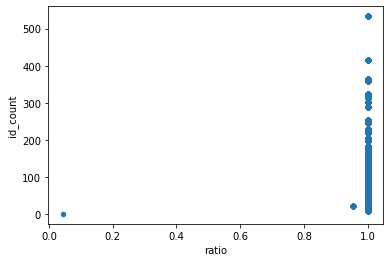

In [43]:
candidate_bac_2.plot('ratio', 'id_count', kind='scatter')

In [44]:
candidate_bac_2[(candidate_bac_2.ratio>=0.1) & (candidate_bac_2.id_count>=5)]\
.sort_values(['ratio', 'id_count'], ascending=True).head(50)

id                 protein     cluster  \
62641  K03278  GUT_GENOME024138_2_161  b_13816492   
62642  K03278  GUT_GENOME283027_3_160  b_13816492   
62643  K03278  GUT_GENOME139624_19_52  b_13816492   
62644  K03278   GUT_GENOME015056_1_47  b_13816492   
62645  K03278       3300029057_9_1899  b_13816492   
62646  K03278  GUT_GENOME151065_1_622  b_13816492   
62647  K03278   GUT_GENOME150817_1_48  b_13816492   
62648  K03278   GUT_GENOME276737_7_74  b_13816492   
62649  K03278        3300029326_9_364  b_13816492   
62650  K03278   GUT_GENOME271077_25_4  b_13816492   
62651  K03278  GUT_GENOME248344_6_103  b_13816492   
62652  K03278  GUT_GENOME279204_34_22  b_13816492   
62653  K03278  GUT_GENOME154515_10_65  b_13816492   
62654  K03278  GUT_GENOME268675_38_23  b_13816492   
62655  K03278   GUT_GENOME264773_4_38  b_13816492   
62656  K03278   GUT_GENOME270350_2_36  b_13816492   
62657  K03278   GUT_GENOME264263_1_49  b_13816492   
62658  K03278       3300029181_7_1400  b_13816492   
62659  K03278  GUT_GENOME178816_1_623  b_13816492   
62660  K03278   GUT_GENOME270485_9_41  b_13816492   
62661  K03278       3300014954_7_1634  b_13816492   
334    K19506  GUT_GENOME222838_106_6  b_11475348   
335    K19506       3300029388_8_1390  b_11475348   
336    K19506       3300029708_30_962  b_11475348   
337    K19506      3300029515_21_1539  b_11475348   
338    K19506  GUT_GENOME192856_157_4  b_11475348   
339    K19506      3300029039_15_1950  b_11475348   
340    K19506  GUT_GENOME017832_229_4  b_11475348   
341    K19506        3300029604_6_923  b_11475348   
342    K19506   GUT_GENOME264340_40_8  b_11475348   
343    K19506  GUT_GENOME271946_55_15  b_11475348   
1044   K19506   GUT_GENOME165723_36_7  b_10231172   
1045   K19506   GUT_GENOME243797_53_7  b_10231172   
1046   K19506  GUT_GENOME243840_153_3  b_10231172   
1047   K19506    GUT_GENOME111551_2_8  b_10231172   
1048   K19506   GUT_GENOME164436_28_7  b_10231172   
1049   K19506    GUT_GENOME243819_6_4  b_10231172   
1050   K19506  GUT_GENOME243780_186_3  b_10231172   
1051   K19506   GUT_GENOME165742_32_7  b_10231172   
1052   K19506  GUT_GENOME243787_100_4  b_10231172   
1053   K19506   GUT_GENOME244009_33_4  b_10231172   
1576   K19506   GUT_GENOME113152_36_6   b_8447548   
1577   K19506       3300029208_6_1438   b_8447548   
1578   K19506  GUT_GENOME001831_71_12   b_8447548   
1579   K19506  GUT_GENOME263282_10_12   b_8447548   
1580   K19506  GUT_GENOME286915_148_4   b_8447548   
1581   K19506  GUT_GENOME186605_114_7   b_8447548   
1582   K19506   GUT_GENOME123502_73_5   b_8447548   
1583   K19506  GUT_GENOME239775_14_26   b_8447548   
1584   K19506      3300029502_19_1635   b_8447548   

                                                           description  \
62641  UDP-D-galactose:(glucosyl)LPS alpha-1,3-D-galactosyltransferase   
62642  UDP-D-galactose:(glucosyl)LPS alpha-1,3-D-galactosyltransferase   
62643  UDP-D-galactose:(glucosyl)LPS alpha-1,3-D-galactosyltransferase   
62644  UDP-D-galactose:(glucosyl)LPS alpha-1,3-D-galactosyltransferase   
62645  UDP-D-galactose:(glucosyl)LPS alpha-1,3-D-galactosyltransferase   
62646  UDP-D-galactose:(glucosyl)LPS alpha-1,3-D-galactosyltransferase   
62647  UDP-D-galactose:(glucosyl)LPS alpha-1,3-D-galactosyltransferase   
62648  UDP-D-galactose:(glucosyl)LPS alpha-1,3-D-galactosyltransferase   
62649  UDP-D-galactose:(glucosyl)LPS alpha-1,3-D-galactosyltransferase   
62650  UDP-D-galactose:(glucosyl)LPS alpha-1,3-D-galactosyltransferase   
62651  UDP-D-galactose:(glucosyl)LPS alpha-1,3-D-galactosyltransferase   
62652  UDP-D-galactose:(glucosyl)LPS alpha-1,3-D-galactosyltransferase   
62653  UDP-D-galactose:(glucosyl)LPS alpha-1,3-D-galactosyltransferase   
62654  UDP-D-galactose:(glucosyl)LPS alpha-1,3-D-galactosyltransferase   
62655  UDP-D-galactose:(glucosyl)LPS alpha-1,3-D-galactosyltransferase   
62656  UDP-D-galactose:(glucosyl)LPS alpha-1,3-D-galactosyltransferase   
62657  UDP-D-galactose:(glucosyl)LPS alpha-1,3-D-

In [45]:
candidate_bac_2.id.nunique()

63

In [47]:
candidate_bac_2[(candidate_bac_2.ratio>=0.1) & (candidate_bac_2.id_count>=5)]
# .id.nunique()

id                 protein    cluster  \
0      K19506  GUT_GENOME001575_1_140  b_4683921   
1      K19506      3300007353_12_1571  b_4683921   
2      K19506  GUT_GENOME284747_39_17  b_4683921   
3      K19506  GUT_GENOME204926_16_52  b_4683921   
4      K19506  GUT_GENOME000917_7_101  b_4683921   
...       ...                     ...        ...   
68761  K15809  GUT_GENOME199423_46_12  b_6145928   
68762  K15809   GUT_GENOME000831_5_69  b_6145928   
68763  K15809   GUT_GENOME028831_6_74  b_6145928   
68764  K15809  GUT_GENOME058845_1_135  b_6145928   
68765  K15809   GUT_GENOME054189_5_74  b_6145928   

                                                  description  \
0      fructoselysine/glucoselysine PTS system EIIA component   
1      fructoselysine/glucoselysine PTS system EIIA component   
2      fructoselysine/glucoselysine PTS system EIIA component   
3      fructoselysine/glucoselysine PTS system EIIA component   
4      fructoselysine/glucoselysine PTS system EIIA component   
...                                                       ...   
68761                               cis-muuroladiene synthase   
68762                               cis-muuroladiene synthase   
68763                               cis-muuroladiene synthase   
68764                               cis-muuroladiene synthase   
68765                               cis-muuroladiene synthase   

       total_clusters_count  id_count  ratio  
0                        22        22    1.0  
1                        22        22    1.0  
2                        22        22    1.0  
3                        22        22    1.0  
4                        22        22    1.0  
...                     ...       ...    ...  
68761                    16        16    1.0  
68762                    16        16    1.0  
68763                    16        16    1.0  
68764                    16        16    1.0  
68765                    16        16    1.0  

[68765 rows x 7 columns]

In [51]:
candidate_bac_fin = candidate_bac_2[(candidate_bac_2.ratio>=0.1) & (candidate_bac_2.id_count>=5)]
candidate_bac_fin

id                 protein    cluster  \
0      K19506  GUT_GENOME001575_1_140  b_4683921   
1      K19506      3300007353_12_1571  b_4683921   
2      K19506  GUT_GENOME284747_39_17  b_4683921   
3      K19506  GUT_GENOME204926_16_52  b_4683921   
4      K19506  GUT_GENOME000917_7_101  b_4683921   
...       ...                     ...        ...   
68761  K15809  GUT_GENOME199423_46_12  b_6145928   
68762  K15809   GUT_GENOME000831_5_69  b_6145928   
68763  K15809   GUT_GENOME028831_6_74  b_6145928   
68764  K15809  GUT_GENOME058845_1_135  b_6145928   
68765  K15809   GUT_GENOME054189_5_74  b_6145928   

                                                  description  \
0      fructoselysine/glucoselysine PTS system EIIA component   
1      fructoselysine/glucoselysine PTS system EIIA component   
2      fructoselysine/glucoselysine PTS system EIIA component   
3      fructoselysine/glucoselysine PTS system EIIA component   
4      fructoselysine/glucoselysine PTS system EIIA component   
...                                                       ...   
68761                               cis-muuroladiene synthase   
68762                               cis-muuroladiene synthase   
68763                               cis-muuroladiene synthase   
68764                               cis-muuroladiene synthase   
68765                               cis-muuroladiene synthase   

       total_clusters_count  id_count  ratio  
0                        22        22    1.0  
1                        22        22    1.0  
2                        22        22    1.0  
3                        22        22    1.0  
4                        22        22    1.0  
...                     ...       ...    ...  
68761                    16        16    1.0  
68762                    16        16    1.0  
68763                    16        16    1.0  
68764                    16        16    1.0  
68765                    16        16    1.0  

[68765 rows x 7 columns]

### venn diagram of common kegg ids after filtering

In [53]:
candidate_bac_fin.head()

id                 protein    cluster  \
0  K19506  GUT_GENOME001575_1_140  b_4683921   
1  K19506      3300007353_12_1571  b_4683921   
2  K19506  GUT_GENOME284747_39_17  b_4683921   
3  K19506  GUT_GENOME204926_16_52  b_4683921   
4  K19506  GUT_GENOME000917_7_101  b_4683921   

                                              description  \
0  fructoselysine/glucoselysine PTS system EIIA component   
1  fructoselysine/glucoselysine PTS system EIIA component   
2  fructoselysine/glucoselysine PTS system EIIA component   
3  fructoselysine/glucoselysine PTS system EIIA component   
4  fructoselysine/glucoselysine PTS system EIIA component   

   total_clusters_count  id_count  ratio  
0                    22        22    1.0  
1                    22        22    1.0  
2                    22        22    1.0  
3                    22        22    1.0  
4                    22        22    1.0

In [55]:
candidate_archaea_fin.head()

id                     protein  cluster  \
0  K19082  GUT_GENOME103991.fasta_782  a_60600   
1  K19082   GUT_GENOME074072.fasta_78  a_60600   
2  K19082  GUT_GENOME161846.fasta_170  a_60600   
3  K19082  GUT_GENOME161057.fasta_907  a_60600   
4  K19082  GUT_GENOME162792.fasta_580  a_60600   

                                                               description  \
0  two-component system, OmpR family, response regulator protein BraR/BceR   
1  two-component system, OmpR family, response regulator protein BraR/BceR   
2  two-component system, OmpR family, response regulator protein BraR/BceR   
3  two-component system, OmpR family, response regulator protein BraR/BceR   
4  two-component system, OmpR family, response regulator protein BraR/BceR   

   total_clusters_count  id_count  ratio  
0                     8         8    1.0  
1                     8         8    1.0  
2                     8         8    1.0  
3                     8         8    1.0  
4                     8         8    1.0

In [66]:
arch.difference(bac)

{'K00214', 'K06577', 'K11518', 'K12091'}

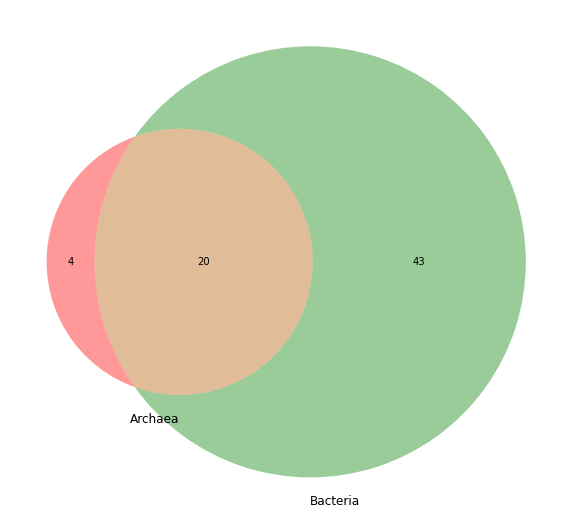

In [56]:
plt.figure(figsize=(10,10))
arch = set(candidate_archaea_fin.id.unique())
bac = set(candidate_bac_fin.id.unique())

venn2([arch, bac], ('Archaea', 'Bacteria'))
plt.show()

## now intersect again

In [331]:
candidate_archaea_fin.cluster.nunique()

31

In [332]:
candidate_bac_fin.cluster.nunique()

2300

In [339]:
common_ids2clusters_2 = pd.merge(candidate_bac_fin[['id', 'cluster']], 
                                 candidate_archaea_fin[['id', 'cluster']], 
                                 on='id')
common_ids2clusters_2

id  cluster_x cluster_y
0       K19082  b_7263830   a_60600
1       K19082  b_7263830   a_60600
2       K19082  b_7263830   a_60600
3       K19082  b_7263830   a_60600
4       K19082  b_7263830   a_60600
...        ...        ...       ...
127338  K19481  b_8534464   a_43431
127339  K19481  b_8534464   a_43431
127340  K19481  b_8534464   a_43431
127341  K19481  b_8534464   a_43431
127342  K19481  b_8534464   a_43431

[127343 rows x 3 columns]

In [340]:
common_ids2clusters_2[['id']].drop_duplicates()

id
0       K19082
75968   K17465
94118   K10436
97878   K14495
105418  K01086
111053  K19543
111553  K13546
111672  K24356
111782  K09469
117182  K23498
120862  K11234
124993  K05615
125053  K22554
125221  K12706
126181  K16158
126300  K15198
126375  K16195
126690  K02369
127146  K21691
127266  K19481

In [341]:
common_ids2clusters_2[['cluster_x']].drop_duplicates()

cluster_x
0        b_7263830
144      b_7897712
256      b_8933918
424     b_10488291
512      b_9837646
...            ...
126300   b_8988958
126375   b_5452672
126690   b_6681309
127146   b_2114628
127266   b_8534464

[508 rows x 1 columns]

In [348]:
# candidate_archaea_fin.merge(common_ids2clusters_2[['cluster_y']].drop_duplicates(), 
#                             left_on='cluster',
#                            right_on='cluster_y')[['protein', 'cluster']]\
# .to_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/instructions_arch_GU_common_kegg_ids.tsv',
#        sep='\t', index=False, header=None)

In [350]:
# candidate_bac_fin.merge(common_ids2clusters_2[['cluster_x']].drop_duplicates(), 
#                             left_on='cluster',
#                            right_on='cluster_x')[['protein', 'cluster']]\
# .to_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/instructions_bac_common_kegg_ids.tsv',
#        sep='\t', index=False, header=None)

In [352]:
candidate_archaea_fin.merge(common_ids2clusters_2[['cluster_y']].drop_duplicates(), 
                            left_on='cluster',
                           right_on='cluster_y')[['protein', 'cluster']]

protein  cluster
0     GUT_GENOME103991.fasta_782  a_60600
1      GUT_GENOME074072.fasta_78  a_60600
2     GUT_GENOME161846.fasta_170  a_60600
3     GUT_GENOME161057.fasta_907  a_60600
4     GUT_GENOME162792.fasta_580  a_60600
..                           ...      ...
836  GUT_GENOME040406.fasta_1109  a_43431
837  GUT_GENOME040374.fasta_1370  a_43431
838            3300029435_39_603  a_43431
839  GUT_GENOME055714.fasta_1699  a_43431
840  GUT_GENOME115540.fasta_1750  a_43431

[841 rows x 2 columns]

In [353]:
candidate_bac_fin.merge(common_ids2clusters_2[['cluster_x']].drop_duplicates(), 
                            left_on='cluster',
                           right_on='cluster_x')[['protein', 'cluster']]

protein    cluster
0      GUT_GENOME103880_1_2225  b_7263830
1        GUT_GENOME207848_3_31  b_7263830
2        GUT_GENOME207939_4_30  b_7263830
3        GUT_GENOME142402_3_32  b_7263830
4       GUT_GENOME207842_2_319  b_7263830
...                        ...        ...
14441   GUT_GENOME056587_133_1  b_8534464
14442        3300029103_13_853  b_8534464
14443    GUT_GENOME117933_50_2  b_8534464
14444    GUT_GENOME071091_90_2  b_8534464
14445     GUT_GENOME233766_1_6  b_8534464

[14446 rows x 2 columns]

# Import

In [10]:
arch = pd.read_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/instructions_arch_GU_common_kegg_ids.tsv',
           header=None, names=['protein', 'cluster'], sep='\t').merge(functions_arch, on=['protein', 'cluster'])

In [11]:
bac = pd.read_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/instructions_bac_common_kegg_ids.tsv',
           header=None, names=['protein', 'cluster'], sep='\t').merge(functions_bac, on=['protein', 'cluster'])

2 candidates 

In [12]:
arch[arch.cluster=='a_43431']

protein  cluster      id         description
834   GUT_GENOME040387.fasta_509  a_43431  K19481  matrix Gla protein
835  GUT_GENOME247693.fasta_1585  a_43431  K19481  matrix Gla protein
836  GUT_GENOME040406.fasta_1109  a_43431  K19481  matrix Gla protein
837  GUT_GENOME040374.fasta_1370  a_43431  K19481  matrix Gla protein
838            3300029435_39_603  a_43431  K19481  matrix Gla protein
839  GUT_GENOME055714.fasta_1699  a_43431  K19481  matrix Gla protein
840  GUT_GENOME115540.fasta_1750  a_43431  K19481  matrix Gla protein

In [13]:
bac[bac.cluster=='b_8534464']

protein    cluster      id         description
14509  GUT_GENOME115413_219_3  b_8534464  K19481  matrix Gla protein
14510       3300029647_7_1089  b_8534464  K19481  matrix Gla protein
14511   GUT_GENOME002715_64_1  b_8534464  K19481  matrix Gla protein
14512   GUT_GENOME015446_53_3  b_8534464  K19481  matrix Gla protein
14513  GUT_GENOME129936_37_15  b_8534464  K19481  matrix Gla protein
14514       3300029678_17_518  b_8534464  K19481  matrix Gla protein
14515  GUT_GENOME056587_133_1  b_8534464  K19481  matrix Gla protein
14516       3300029103_13_853  b_8534464  K19481  matrix Gla protein
14517   GUT_GENOME117933_50_2  b_8534464  K19481  matrix Gla protein
14518   GUT_GENOME071091_90_2  b_8534464  K19481  matrix Gla protein
14519    GUT_GENOME233766_1_6  b_8534464  K19481  matrix Gla protein

In [14]:
dendr_clusters = pd.read_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/dendrogram_clusters_same_kegg.tsv',
                            header=None, names=['cluster'])
dendr_clusters

cluster
0    a_135737
1     a_21044
2     a_73547
3     a_74498
4    a_147408
5     a_45460
6     a_51418
7     a_95863
8    a_135089
9     a_91313
10    a_43431
11  b_8534464